In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
train_data=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="nearest"
)
test_data=ImageDataGenerator(
    rescale=1./255
)
train=train_data.flow_from_directory(
    r'xray_dataset_covid19\train',
    target_size=(256,256),
    batch_size=16,
    class_mode="binary"
)
test=test_data.flow_from_directory(
    r"xray_dataset_covid19\test",
    target_size=(256,256),
    batch_size=16,
    class_mode="binary"
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [3]:
model=Sequential()
model.add(Conv2D(104,(5,5),activation="sigmoid",input_shape=(256,256,3),padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D((4,4),strides=2,padding="valid"))
model.add(Conv2D(26,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=1,padding="valid"))
model.add(Conv2D(104,(5,5),activation="sigmoid",padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D((4,4),strides=2,padding="same"))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3376490701702315))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.4785583015103898))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(
    train,
    steps_per_epoch=9,
    epochs=100,
    validation_data=test,
    validation_steps=2)

Epoch 1/100
9/9 [==============================] - 23s 2s/step - loss: 3.7919 - accuracy: 0.5909 - val_loss: 0.7140 - val_accuracy: 0.3750
Epoch 2/100
9/9 [==============================] - 17s 2s/step - loss: 4.5350 - accuracy: 0.5682 - val_loss: 1.6254 - val_accuracy: 0.5312
Epoch 3/100
9/9 [==============================] - 19s 2s/step - loss: 0.9160 - accuracy: 0.6458 - val_loss: 1.3637 - val_accuracy: 0.4688
Epoch 4/100
9/9 [==============================] - 17s 2s/step - loss: 0.6302 - accuracy: 0.6439 - val_loss: 1.0423 - val_accuracy: 0.4375
Epoch 5/100
9/9 [==============================] - 18s 2s/step - loss: 0.9425 - accuracy: 0.6212 - val_loss: 0.9656 - val_accuracy: 0.4688
Epoch 6/100
9/9 [==============================] - 17s 2s/step - loss: 0.6192 - accuracy: 0.6894 - val_loss: 1.0695 - val_accuracy: 0.4688
Epoch 7/100
9/9 [==============================] - 18s 2s/step - loss: 0.8271 - accuracy: 0.7121 - val_loss: 1.0752 - val_accuracy: 0.4688
Epoch 8/100
9/9 [==========

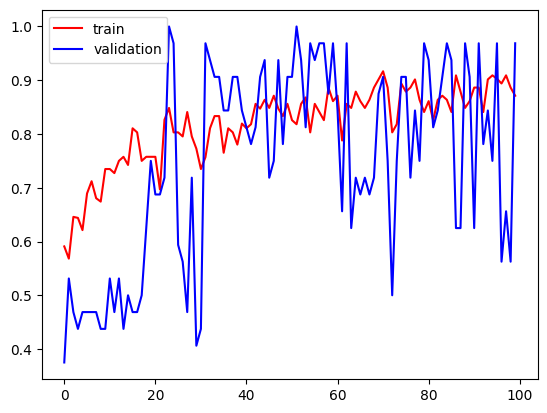

In [4]:
plt.plot(history.history["accuracy"],color="red",label="train")          #this fast changes is because of very less data in deep learning we need data more than 10,000 of images  
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

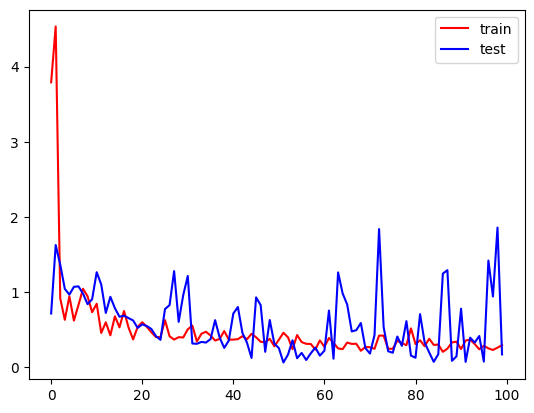

In [5]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="test")
plt.legend()
plt.show()

In [6]:
model.save('covid19_xray_model.h5')

d:\ml\project\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
